# Dari Sentiment Analysis 

Sentiment Analysis of Facebook Dataset 

## Loading Python Libraries 

In [1]:
import pandas as pd 
#used for read, write, and manipulate Data
import numpy as np 
# used to scientific computing or different operation
import re 
# used to match, find and replace sets of strings 
import matplotlib.pyplot as plt 
#is a python libaray, used to plot numaric Data to object oranted
from string import punctuation 
# used to know punctuation from Dataset
from sklearn.feature_extraction.text import TfidfVectorizer 
# type of vectorization Dataset, term frequency inverse-document frequency used to convert Dataset to numaric 
from sklearn.model_selection import train_test_split 
#is a function used to Split or partition Datasets to train set and test set.
from sklearn.linear_model import LogisticRegression 
#is type of Supervised ML Algorithm, used to train Dataset
from sklearn.model_selection import cross_val_score 
# it tells if my model is Overfit or underfit 'score'
from sklearn.model_selection import cross_val_predict 
#it tells if my model is Overfit or underfit 'predict'
from sklearn.metrics import confusion_matrix 
# it is a table, which which is use for describe the performance of a classifiction model 
from sklearn.metrics import precision_score, recall_score 
#used to calculated percision score and recall score
from sklearn.ensemble import RandomForestClassifier   
#is type of Supervised ML Algorithm, used to train Dataset
from sklearn.linear_model import SGDClassifier  
#it is a solver for discriminative learning of linear classifiers under convex loss functions such as (linear) Support Vector Machines 
%matplotlib inline  
# used to plot in jupyter notebook

In [2]:
from __future__ import unicode_literals
from hazm import *     # used to pre-process the Datasets

## Export dataset from file

In [3]:
pd.set_option('display.max_colwidth', 100)
data = pd.read_csv("/Users/ak_etman/Desktop/a/Thesis/Thesis_Project_Datasets/Dari_Dataset.csv" ,sep ="," )
data.head()

,Comments,Label
0,وظیفه شکر رخصت و فانتون هم عصر ایند فیلینگ چهار پلاق افتر سپورت,1
1,امی لحظه خبر خوش رسید \nکه دانشگاه رخصت است,1
2,به اولاد های ننم رسیدگی میکنم..,1
3,امی لحظه خبر خوش رسید \nکه دانشگاه رخصت است,1
4,وظیفه رفتم,1


In [4]:
#lenght of csv file 
len(data)

2638

Shuffling Index of Dataset which can Predict and Fit Better

In [5]:
np.random.seed(10)
shuffle_index = np.random.permutation(len(data))
data = data.loc[shuffle_index]
data.head()

,Comments,Label
1217,Rezwan Bagram اینی آدم اگر هور بهشتی ره هم ببینه ده قصیش نیست,1
2343,بره وی,0
326,بدون بوت و چپلي هاي بلند اينقه قدوگك هستن \n.\n.\n\n#رشيدى,1
881,عالی,1
1464,روز زیر داکترهای ترک تحت تداوی بودیم کمپاین های انتخابات ریاست\nجمهوری در بغلان بودصداکرد اوقوم...,0


## number of positive, nagitiave sentance and missing data

In [6]:
nagative = len(data[data["Label"] == 0])
positive = len(data[data["Label"] == 1])
missing =data ["Label"].isnull().sum()
missing1 =data ["Comments"].isnull().sum()
print("nagative= ", nagative)
print("positive= ", positive)
print("missing label= ", missing)
print("missing comment= ", missing1)

nagative=  1227
positive=  1411
missing label=  0
missing comment=  0


## Removing all digit and English words

In [7]:
fixed_array=[]
for x in range(len(data)):
        text = re.sub('[1234567890ABCDEFGHIJKLMNOPQRSTUWXYZabcdefjhijklmnopqrstuvwxyz]', '', data.iloc[x, 0], flags = re.M)
        fixed_array.append(text)


Use Train Test Split to Train Dataset in case of 80% split for training Data and 20% split for testing the Dataset

In [8]:
#classifiction and train dataset 
X = fixed_array
y = data.iloc[:, 1].as_matrix()
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

/Users/ak_etman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


## preprocess

In [9]:
class preprocess(object):

    def remove_digit_english (x_train):
        X_preprocessed = []
        for x in range(len(x_train)):
            text = re.sub('[1234567890ABCDEFGHIJKLMNOPQRSTUWXYZabcdefjhijklmnopqrstu]', '', X_train[x], flags = re.M )
            X_preprocessed.append(text)
            return X_preprocessed
        
    def remove_emoji(x_train):
        #remove all emojis  
        data["Comments"]= data["Comments"].str.replace('[^\w\s#@/:%.,_-]',"",flags=re.UNICODE)
        return x_train

    #remove all punctuations
    def remove_punctuations(x_train):
        return "".join(c for c in s if c not in punctuation)
        punctuations(x_train)

    def normalize_data(x_train):   
        normaliz= []
        for x in range(len(x_train)):
            normalizer = Normalizer()
            normalize = normalizer.normalize(fixed_array[x])
            normaliz.append(normalize)
            return normaliz
            
    def tokenize_data(normaliz):

        #tokenize all dataset 
        token =[]
        for x in range(len(normaliz)):
            token1= sent_tokenize(normaliz[x])
            token.append(token1)
            return token
        
    def stemmers_data(token):
        
    #stemmer all words
        stemmers=[]
        for x in range(len(token)):
            for y in range(len(token[x])):
                stemmer= Stemmer()
                stemmer1= stemmer.stem(token[x][y])
                stemmers.append(stemmer1)
                return stemmers

In [10]:
X_preprocessed = []
for x in range(len(x_train)):
        text = re.sub('[1234567890ABCDEFGHIJKLMNOPQRSTUWXYZabcdefjhijklmnopqrstu]', '', x_train[x], flags = re.M )
        X_preprocessed.append(text)

## Vectorizing Dataset with TF-IDF Vectorizer  

First can create an object of TF_IDF Vectorizer, then pass the preprocessed Data to fit it to method and change it to feature vectors and finally convert it to array.  

In [11]:
tf = TfidfVectorizer()
vectorized_commetns = tf.fit_transform(X_preprocessed)
vectorized_commetns.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# GridSearchCV

GridSearchCV is acually used to combine an estamitor with a grid search preamble to tune hyperparameters, Train Dataset with SVM Model which has linear kernal, C=1, and thier Random State is equal zero.

In [12]:
from sklearn.svm import SVC 
c =SVC(random_state=0, kernel='linear', C=1 )

In here c is object of SVM Model, it can fit the X_train and Y_train to SVM Model for feature works 

In [13]:
c.fit(vectorized_commetns,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

Predict is a method which shows can ML Model know classification of Dataset(true, false)

In [14]:
y_pred =c.predict(vectorized_commetns)
y_pred

array([0, 0, 0, ..., 0, 1, 1])

Testing sample of Dataset

In [15]:
x3 = ['جمله مقبول است  ']
a = tf.transform(x3).toarray()
result = c.predict(a)

In [16]:
if result[0] > 0:
    print("😁جمله شما مثبت است")
else: 
    print("😕 جمله شما منفی است")

😁جمله شما مثبت است


Confustion matrix is a table which is use for describe the performance of a classifiction model on a set of test data for which the true values are known.
it allows the visualization of the performance of an algorithm.

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_pred)
cm

array([[ 962,   18],
       [  46, 1084]])

This method used for predic the Precission, Recall, and F1_Score  

In [18]:
def print_p_r_f1_score(confusion_matrix):
    print("Precission: ",confusion_matrix[1][1]/(confusion_matrix[0][1] + confusion_matrix[1][1]))
    print("recall: ", confusion_matrix[1][1]/(confusion_matrix[1][0] + confusion_matrix[1][1]))
    print("F1 Score: ", 2* ((confusion_matrix[1][1]/(confusion_matrix[1][1] + confusion_matrix[1][0])*(confusion_matrix[1][1]/(confusion_matrix[0][1] + confusion_matrix[1][1]))))/ ((confusion_matrix[1][1]/(confusion_matrix[1][1] + confusion_matrix[1][0]))+(confusion_matrix[1][1]/(confusion_matrix[0][1] + confusion_matrix[1][1]))) )
print_p_r_f1_score(cm)

Precission:  0.9836660617059891
recall:  0.95929203539823
F1 Score:  0.9713261648745519


Shows Score of Dataset accuracy 

In [19]:
from sklearn.metrics import accuracy_score
accurac = accuracy_score(y_train, y_pred)
accurac

0.9696682464454977

# LogisticRegression

LogisticRegression is type of supervised classifcation model, which is used to model the probability of a certain class or event existing such as pass/fail, positive/negative, and such prediction.
First Step, create object of this Model, then fit the Dataset. 

In [20]:
log_clf = LogisticRegression()
log_clf.fit(vectorized_commetns, y_train)

/Users/ak_etman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
x = ['زندگی کوتا است لبخند بزن']
x1 = [' برای مشکلات امنیتی افغانستان راه حل موثری ارایه نشده است']  

In [22]:
test = tf.transform(x1).toarray()
result = log_clf.predict(test)

In [23]:
if result[0] > 0:
    print("😁جمله شما مثبت است")
else: 
    print("😕 جمله شما منفی است")

😕 جمله شما منفی است


In [24]:
cross_val_score(log_clf, vectorized_commetns, y_train, cv = 3)

/Users/ak_etman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.80965909, 0.74857955, 0.77065527])

In [25]:
t= cross_val_predict(log_clf, vectorized_commetns, y_train, cv = 3)
t

/Users/ak_etman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 1, 1, ..., 0, 1, 1])

In [26]:
confusion= confusion_matrix(y_train, t)
confusion

array([[700, 280],
       [192, 938]])

In [27]:
def print_p_r_f1_score(confusion_matrix):
    print("Precission: ",confusion_matrix[1][1]/(confusion_matrix[1][1] + confusion_matrix[0][1]))
    print("recall: ", confusion_matrix[1][1]/(confusion_matrix[1][1] + confusion_matrix[1][0]))
    print("F1 Score: ", 2* ((confusion_matrix[1][1]/(confusion_matrix[1][1] + confusion_matrix[1][0])*(confusion_matrix[1][1]/(confusion_matrix[0][1] + confusion_matrix[1][1]))))/ ((confusion_matrix[1][1]/(confusion_matrix[1][1] + confusion_matrix[1][0]))+(confusion_matrix[1][1]/(confusion_matrix[0][1] + confusion_matrix[1][1]))) )
print_p_r_f1_score(confusion)

Precission:  0.7701149425287356
recall:  0.8300884955752212
F1 Score:  0.798977853492334


In [28]:
from sklearn import metrics
metrics.accuracy_score(y_train ,t)

0.776303317535545

In [29]:
from sklearn.metrics import accuracy_score
y_pred_linear =log_clf.predict(vectorized_commetns)

accuracy_log_cls = accuracy_score(y_train, y_pred_linear)
accuracy_log_cls

0.9383886255924171

# Random Forest 

Random Forest increases predictive power of the algorithm and also helps prevent overfitting. Random forest is the most simple and widely used algorithm. Used for both classification and regression. It is an ensemble of randomized decision tree.
import Random Forest library, create an object, transform, and fit Dataset to ML Model.

In [30]:
rfor = RandomForestClassifier()
rf = TfidfVectorizer()
r = rf.fit_transform(X_preprocessed)
r.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
rfor.fit(r,y_train)

/Users/ak_etman/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
rn = ['مقبول  ']
rn2 = ['شما با ده ها دستگاه تانک و نفربر و صدها فروند هلیکوپترهای پیشرفته آمدید به افغانستان و جنایتهایی را انجام دادیداز هیچ جنایتی فروگذار نکردید عروسی ها را به خاک و خون کشیدیدشما بعد از  تا  با  هزار سرباز چه غلطی کردیدامروز دارید پیش طالبان التماس میکنید برای گفتگو']


In [33]:
test1 = rf.transform(rn2).toarray()

In [34]:
result = rfor.predict(test1)

In [35]:
if result[0] > 0:
    print("😁جمله شما مثبت است")
else: 
    print("😕 جمله شما منفی است")

😕 جمله شما منفی است


In [36]:
cross_val_score(rfor, r, y_train, cv = 3)


array([0.75994318, 0.734375  , 0.72364672])

In [37]:
F= cross_val_predict(rfor, r, y_train, cv = 3)
F

array([0, 0, 1, ..., 0, 1, 1])

In [38]:
confusion_f =confusion_matrix(F, y_train)
confusion_f

array([[636, 193],
       [344, 937]])

In [39]:
def print_p_r_f1_score(confusion_matrix):
    print("Precission: ",confusion_matrix[1][1]/(confusion_matrix[1][1] + confusion_matrix[1][0]))
    print("recall: ", confusion_matrix[1][1]/(confusion_matrix[1][1] + confusion_matrix[0][1]))
    print("F1 Score: ", 2* ((confusion_matrix[1][1]/(confusion_matrix[1][1] + confusion_matrix[1][0])*(confusion_matrix[1][1]/(confusion_matrix[0][1] + confusion_matrix[1][1]))))/ ((confusion_matrix[1][1]/(confusion_matrix[1][1] + confusion_matrix[1][0]))+(confusion_matrix[1][1]/(confusion_matrix[0][1] + confusion_matrix[1][1]))) )
print_p_r_f1_score(confusion_f)

Precission:  0.7314597970335676
recall:  0.8292035398230089
F1 Score:  0.7772708419742846


In [40]:
from sklearn.metrics import accuracy_score
y_pred_random_forest =rfor.predict(vectorized_commetns)
accuracy_random = accuracy_score(y_train, y_pred_random_forest)
accuracy_random

0.9881516587677726

# SGDClassifiation

Stochastic Gradient Descent (sgd) is a solver. It is a simple and efficient approach for discriminative learning of linear classifiers under convex loss functions such as (linear) Support Vector Machines and Logistic Regression. The solver for weight optimization. In this case, we used SVM implemented by SGD Classifier. also the prediction,cross_val_score, cross_val_predict, confusion_matrix, print_p_r_f1_score, and accuracy work similar with other classifiction which I mentioned to Above Classifire.   

In [41]:
sgd =SGDClassifier()
sgd.fit(vectorized_commetns, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [42]:
pr=sgd.predict

In [43]:
a=cross_val_score(sgd, vectorized_commetns, y_train, cv = 3)
a.max()

0.7954545454545454

In [44]:
SGD1= cross_val_predict(log_clf, vectorized_commetns, y_train, cv = 3)
SGD1

/Users/ak_etman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 1, 1, ..., 0, 1, 1])

In [45]:
confusion_sgd= confusion_matrix(SGD1 , y_train)
confusion_sgd

array([[700, 192],
       [280, 938]])

In [46]:
def print_p_r_f1_score(confusion_matrix):
    print("Precission: ",confusion_matrix[1][1]/(confusion_matrix[1][1] + confusion_matrix[1][0]))
    print("recall: ", confusion_matrix[1][1]/(confusion_matrix[1][1] + confusion_matrix[0][1]))
    print("F1 Score: ", 2* ((confusion_matrix[1][1]/(confusion_matrix[1][1] + confusion_matrix[1][0])*(confusion_matrix[1][1]/(confusion_matrix[0][1] + confusion_matrix[1][1]))))/ ((confusion_matrix[1][1]/(confusion_matrix[1][1] + confusion_matrix[1][0]))+(confusion_matrix[1][1]/(confusion_matrix[0][1] + confusion_matrix[1][1]))) )
print_p_r_f1_score(confusion_sgd)

Precission:  0.7701149425287356
recall:  0.8300884955752212
F1 Score:  0.798977853492334


In [47]:
s = ['شادخت ']
s1 = ['خشم خسته کننده']

In [48]:
test2 = rf.transform(s).toarray()
result2 = rfor.predict(test2)

In [49]:
if result2[0] > 0:
    print("😁جمله شما مثبت است")
else: 
    print("😕 جمله شما منفی است")

😁جمله شما مثبت است


In [50]:
y_pred =sgd.predict(vectorized_commetns)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train, y_pred)
accuracy

0.9957345971563981

# Visualize the relationship between our features

# ROC

A useful tool when predicting the probability of a binary outcome is the Receiver Operating Characteristic curve, or ROC curve. It is a plot of the false positive rate (x-axis) versus the true positive rate (y-axis) for a number of different candidate threshold values between 0.0 and 1.0. In here we used SKLearn library to plot Dataset with Different Mchine Learning Models.

In [51]:
from sklearn.metrics import roc_curve

In [52]:
y_scores_c = cross_val_predict(c, vectorized_commetns, y_train, cv=3,method="decision_function")


y_scores = cross_val_predict(log_clf, vectorized_commetns, y_train, cv=3,method="decision_function")
y_scores_sgd =cross_val_predict(sgd, vectorized_commetns,y_train, cv=3,method="decision_function" )
y_probas_forest = cross_val_predict(rfor, r, y_train, cv=3, method="predict_proba")
y_scores_forest = y_probas_forest[: , 1] # score = proba of positive class

/Users/ak_etman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [53]:
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1] 
if y_scores_c.ndim == 2:
    y_scores = y_scores_c[:, 1] 
if y_scores_sgd.ndim == 2:
    y_scores_sgd = y_scores_sgd[:, 1]

In [54]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

In [55]:
fpr_c, tpr_c, thresholds_c = roc_curve(y_train, y_scores_c)

In [56]:
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_train, y_scores_sgd)

In [57]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train,y_scores_forest)

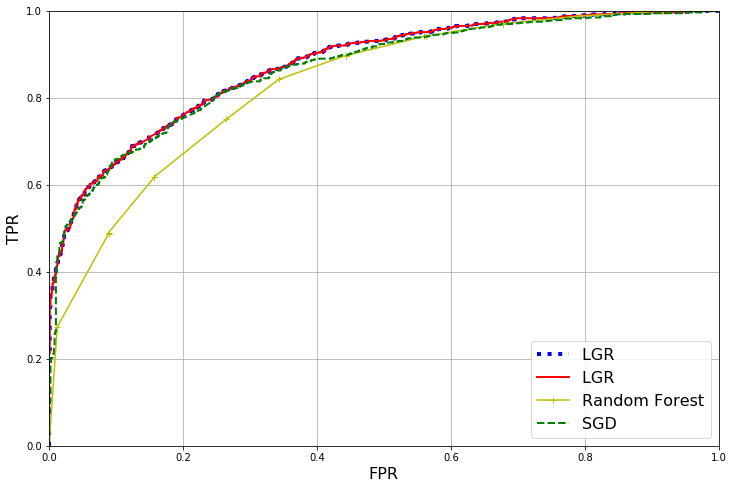

In [58]:
plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, "b:", linewidth=4, label="LGR ")
plt.plot(fpr, tpr, "r-", linewidth=2, label="LGR ")


plt.plot(fpr_forest, tpr_forest,'y+-', label="Random Forest")
plt.plot(fpr_sgd, tpr_sgd, "g--", linewidth=2, label="SGD")
plt.legend(loc="lower right", fontsize=16)
plt.xlabel("FPR", fontsize=16)
plt.ylabel("TPR", fontsize=16)
#.axis([0, 1, 0, 1])
plt.xlim([0 , 1])
plt.ylim([0, 1])
plt.grid(True)
plt.show()

In [59]:
print('LGR: ',metrics.roc_auc_score(y_train,y_scores))
print('SVM: ',metrics.roc_auc_score(y_train,y_scores_c))
print('SGD:',metrics.roc_auc_score(y_train,y_scores_sgd))
print('Random Forest:',metrics.roc_auc_score(y_train,y_scores_forest))

LGR:  0.8749832942026369
SVM:  0.8724381433989525
SGD: 0.865696225392812
Random Forest: 0.8309183673469388


# Precision_Recall_Curve

Precision-recall curves are typically used in binary classification to study the output of a classifier. In order to extend the precision-recall curve and average precision to multi-class or multi-label classification, it is necessary to binarize the output.

In [60]:
from sklearn.metrics import precision_recall_curve

In [61]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
precisions_c, recalls_c, thresholds_c = precision_recall_curve(y_train, y_scores_c)
precisions_sgd, recalls_sgd, thresholds_sgd = precision_recall_curve(y_train, y_scores_sgd)
recalls_forest, precisions_forest, thresholds_forest = precision_recall_curve(y_train, y_scores_forest)


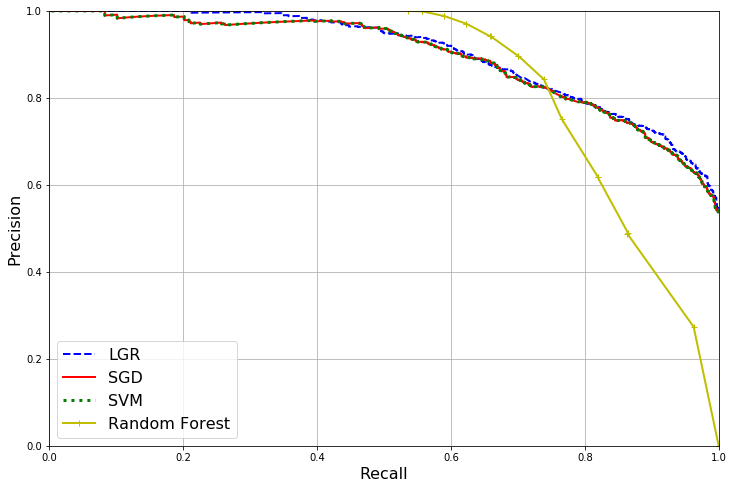

In [62]:
# plot LGD, SGD, R_forest
plt.figure(figsize=(12, 8))
plt.plot(recalls, precisions, "b--", linewidth=2 ,label="LGR")
plt.plot(recalls_sgd, precisions_sgd,'r-' , linewidth=2, label="SGD")
plt.plot(recalls_sgd, precisions_sgd,'g:' , linewidth=3, label="SVM")
plt.plot(recalls_forest, precisions_forest,'y+-', linewidth=2, label="Random Forest")
plt.xlabel("Recall", fontsize=16)
plt.ylabel("Precision", fontsize=16)
plt.legend(loc="best", fontsize=16)
#plt.axis([1, 2, 1, 2])
plt.xlim([0 ,  1])
plt.ylim([0, 1])
plt.grid(True)
plt.show()


# learning curve

The learning curve model is used most commonly in organizational or industrial management to improve output by way of improving the performance of the human workforce. Simple can say Learning Curve used to optimize the cast function.

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [64]:
def plot_learning_curve(estimator, title, X, y, ylim=(0, 1), cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
#     plt.subplot(2, 2,n)
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

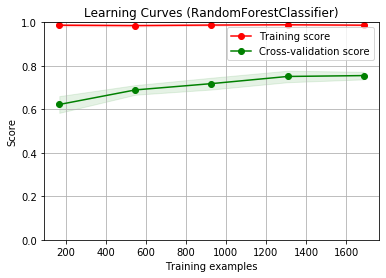

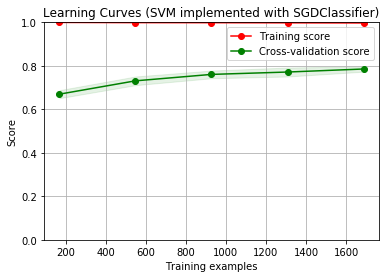

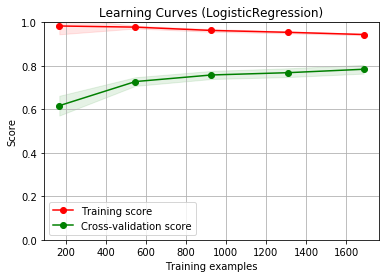

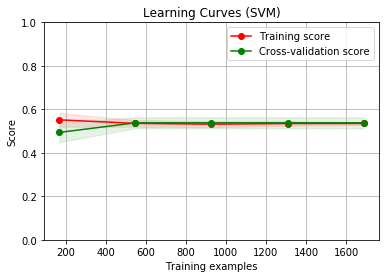

In [65]:
X, y = vectorized_commetns, y_train

title = "Learning Curves (RandomForestClassifier)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
estimator = RandomForestClassifier()
plot_learning_curve(estimator, title, X, y, ylim=(0, 1),cv=cv, n_jobs=-1)

title = r"Learning Curves (SVM implemented with SGDClassifier)"
# SGDClassifier:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
estimator2 = SGDClassifier()
plot_learning_curve(estimator2, title, X, y,   ylim=(0, 1), cv=cv, n_jobs=-1)

title = r"Learning Curves (LogisticRegression)"
# LogisticRegression:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
estimator3 = LogisticRegression()
plot_learning_curve(estimator3, title, X, y,   ylim=(0, 1), cv=cv, n_jobs=-1)

title = r"Learning Curves (SVM)"
# LogisticRegression:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
estimator4 = SVC()
plot_learning_curve(estimator4, title, X, y,   ylim=(0, 1), cv=cv, n_jobs=-1)

plt.show()

# conclusion 

As a conclusion, we found that this Dataset work properly with SVM classifier and work with Random Forest unlikely, and the results shows with different clear Curves, which is plotted above 😁

By: Asiah "Etman"